In [1]:
from grad_val import GradVal
from random import random
import numpy as np

In [2]:
model_size = 3
weights = np.array([GradVal(random()) for _ in range(model_size)])
params = np.array([GradVal(random()) for _ in range(model_size)])
out = (weights * params)
for i in range(len(out)):
    out[i] = out[i].relu()

final = np.sum(out)

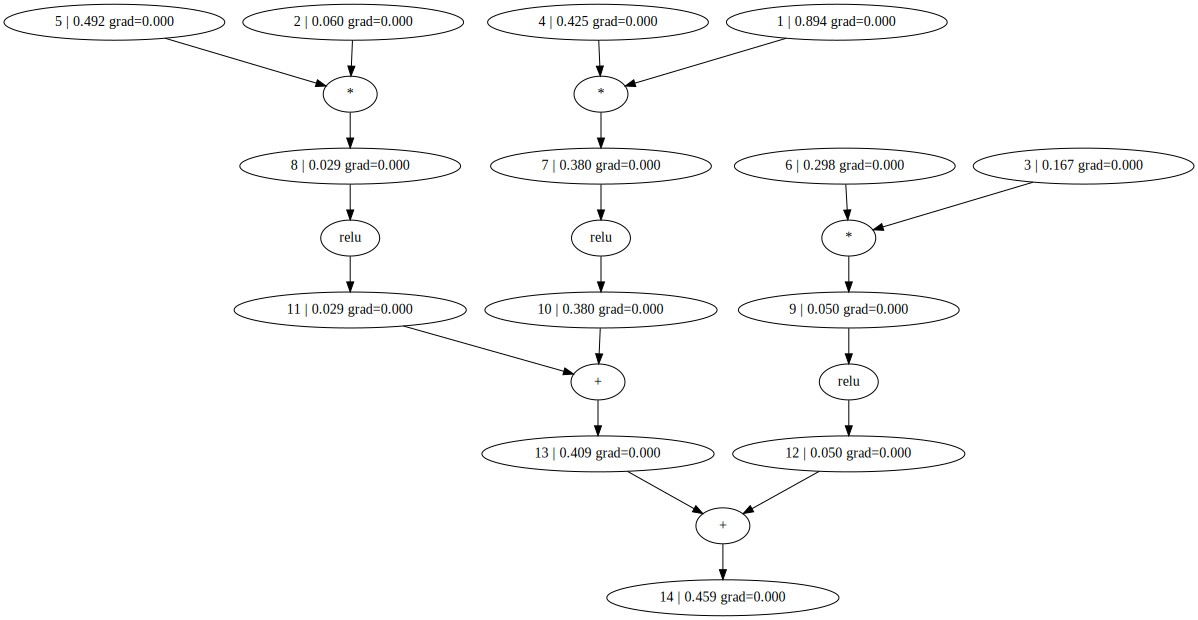

In [3]:
final.visualize()

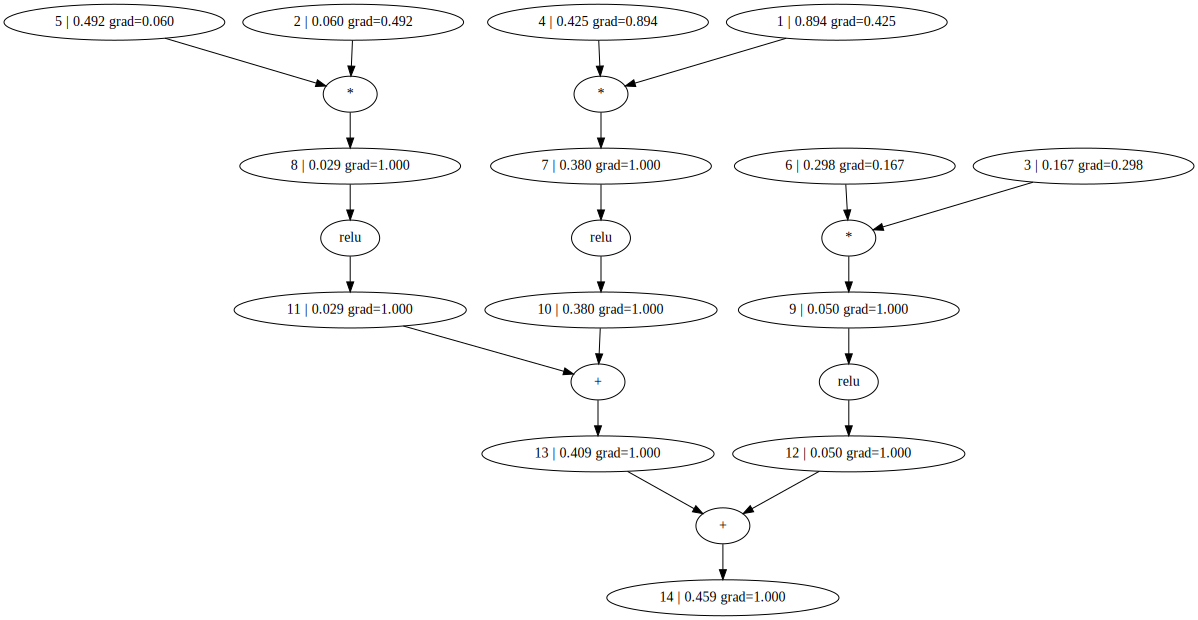

In [4]:
final.backward()
final.visualize()

In [1]:
from neural_net import *
from optimizer import GDOptimizer
from loss import MSELoss

BATCH_SIZE = 32

y_true = np.array([GradVal(random()) for _ in range(BATCH_SIZE)])
x = np.array([[GradVal(random()) for _ in range(8)] for _ in range(BATCH_SIZE)])

pipeline = [BiasedLinearLayer(8, 16), ReluLayer(), BiasedLinearLayer(16, 8), ReluLayer(), BiasedLinearLayer(8, 1)]
model = Model(pipeline=pipeline)
optimizer = GDOptimizer(model.parameters(), lr=1e-4)
loss = MSELoss()

y_pred = model.forward(x)
loss_grad = loss.loss(y_pred=y_pred, y_true=y_true)
loss_grad.backward()
optimizer.optimize()
loss_grad.zero_grad()


In [5]:
y_pred = model.forward(x)
loss_grad = loss.loss(y_pred=y_pred, y_true=y_true)
loss_grad.backward()
optimizer.optimize()
print(y_pred)
print(loss_grad.val)
loss_grad.zero_grad()

NameError: name 'model' is not defined

In [34]:
from __future__ import annotations
from typing import Callable, Union
import numpy as np


class GradTensor:
    def __init__(self, vals: np.ndarray, ancestors: tuple=(), op:str = "") -> None:
        self.vals: np.ndarray[float] = vals
        self.gradient: np.ndarray[float] = None
        self._back: Callable = lambda: None
        self.shape = self.vals.shape

    def __add__(self, other: Union[GradTensor, float, int]) -> GradTensor:
        other = other if isinstance(other, GradTensor) else GradTensor(np.zeros(self.shape) + other)
        assert other.shape == self.shape
        new_tensor = GradTensor(vals=self.vals + other.vals, ancestors=(self, other), op="+")

        def _back_closure():
            other.gradient += new_tensor.gradient
            self.gradient += new_tensor.gradient

        new_tensor._back = _back_closure

        return new_tensor


    def __neg__(self) -> None:
        pass

    def __matmul__(self, other: GradTensor) -> GradTensor:
        new_tensor = GradTensor(self.vals @ other.vals)
        return new_tensor
    
    def backward(self) -> None:
        assert self.shape == (1,1)
        
        order: list[GradVal] = []
        visited: set[GradVal] = set()

        def search(vertex: GradVal):
            if vertex in visited:
                return
            visited.add(vertex)
            for ancestor in vertex.ancestors:
                search(ancestor)
            order.append(vertex)

        search(self)

        self.gradient = np.ones(self.shape)
        for vertex in reversed(order):
            vertex._back()


In [43]:
a = GradTensor(np.ones((1000, 8)))
b = GradTensor(np.zeros((8, 1)) + random())
c = GradTensor(np.zeros((1, 1000)) + 1/1000.)
d = a @ b
e = c @ d

In [45]:
e.vals.shape

(1, 1)

In [47]:
np.ones((32, 8, 8)) + (np.zeros((8, 8)) + random())

array([[[1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        ...,
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683]],

       [[1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        ...,
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
         1.1663683],
        [1.1663683, 1.1663683, 1.1663683, ..., 1.1663683, 1.1663683,
   